Text(0.5, 1.0, 'Percentage of Breaks Caused by Selected Pipe Widths')

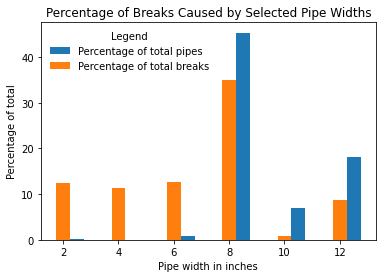

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

df_pipes = pd.read_csv('Pipes_Final.csv')
df_breaks = pd.read_excel('seattle_breaks.xlsx')

df_p = df_pipes.groupby('Width').agg(['count'])
df_b = df_breaks.groupby('SIZE\n(in inches)').agg(['count'])

df_p = df_p['OBJECTID', 'count']
df_p = pd.DataFrame(df_p)
df_p['percent'] = (df_p['OBJECTID', 'count'] / len(df_pipes)) * 100

df_b = df_b['WONUM', 'count']
df_b = pd.DataFrame(df_b)
df_b['percent'] = (df_b['WONUM', 'count'] / len(df_breaks)) * 100

#(df_b[2.0] / len(df_breaks)) * 100
#print(df_pipes)

plt.figure()
#xvals = ['2.0\"', '4.0\"', '6.0\"', '8.0\"', '12.0\"']
xvals = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
pxvals = []
for x in xvals:
    pxvals.append(x + 0.5)
yvals = [df_b['percent'][2.0],df_b['percent'][4.0],df_b['percent'][6.0],df_b['percent'][8.0],df_b['percent'][10.0], df_b['percent'][12.0]]
pyvals = [df_p['percent'][2.0],df_p['percent'][4.0],df_p['percent'][6.0],df_p['percent'][8.0],df_p['percent'][10.0],df_p['percent'][12.0]]

plt.bar(pxvals, pyvals, width = 0.5, label = 'Percentage of total pipes')
plt.bar(xvals, yvals, width = 0.5, label = 'Percentage of total breaks')

plt.xlabel('Pipe width in inches')
plt.ylabel('Percentage of total')
plt.legend(loc=2, frameon=False, title='Legend')
plt.title('Percentage of Breaks Caused by Selected Pipe Widths')